<table class="tfo-notebook-buttons" align="center">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/practicaldl/Practical-Deep-Learning-Book/blob/master/code/chapter-2/1-predict-class.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/practicaldl/Practical-Deep-Learning-Book/blob/master/code/chapter-2/1-predict-class.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

This code is part of [Chapter 2 - What’s in the Picture: Image Classification with Keras](https://learning.oreilly.com/library/view/practical-deep-learning/9781492034858/ch02.html).

In [1]:
try:
  import google.colab
  IS_COLAB_ENV = True
except:
  IS_COLAB_ENV = False
IS_COLAB_ENV

False

In [5]:
pip install tensorflow==2.15.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 829.5 kB/s eta 0:00:00 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.3/181.3 kB 2.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.9/211.9 MB 2.4 MB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 5.9 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 8.2 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 6.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 6.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 6.8 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 303.5/303.5 kB 9.3 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/44

# Predict Category of an Image

The image classification task simply answers the question “Does the image contain X” where X can be a cat, dog or any other category/class of objects. In this file, we see the code for predicting categories for an image.

We start off by importing all the necessary modules from Keras and Python packages. Numpy here gives us the ability to transform matrices, while Matplotlib is graph plotting library that also allows us to display images.

In [6]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

Once we have imported our libraries, we will load and display our test image in a 224x224 resolution.

In [16]:
IMG_PATH = './sample_images/dog.jpg'

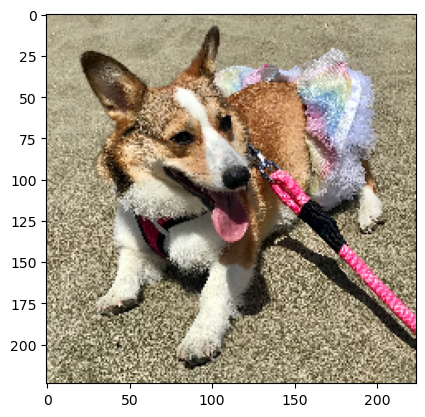

In [17]:
img = image.load_img(IMG_PATH, target_size=(224, 224))
plt.imshow(img)
plt.show()

In [13]:
model = tf.keras.applications.resnet50.ResNet50()

102967424/102967424 [==============================] - 6s 0us/step


Our model has previously been trained only to accept a batch of images. `expand_dims` adds an extra dimension to the array, thereby creating an array of arrays (or a batch of one image).

In [18]:
def predict(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    model = tf.keras.applications.resnet50.ResNet50()
    img_array = image.img_to_array(img)
    img_batch = np.expand_dims(img_array, axis=0)
    img_preprocessed = preprocess_input(img_batch)
    prediction = model.predict(img_preprocessed)
    print(decode_predictions(prediction, top=3)[0])

In [19]:
predict(IMG_PATH)

1/1 [==============================] - 1s 522ms/step
[('n02113186', 'Cardigan', 0.8349685), ('n02113023', 'Pembroke', 0.15543437), ('n02110806', 'basenji', 0.0028011182)]
